
# Laboratorio 3
* Silvio Urizar
* 23008701

In [2]:
import numpy as np 
import pandas as pd 
import re
import os
import spacy
import spacy.cli

## Problema 1:


1. Implemente una regex para validar un correo electrónico en general.

In [3]:
r'^(?!.*\.{2})[^\W][a-zA-Z0-9\.\-\_]+[^\W]+@[a-zA-Z0-9][^\W]+\.+(com|edu|net)$'

'^(?!.*\\.{2})[^\\W][a-zA-Z0-9\\.\\-\\_]+[^\\W]+@[a-zA-Z0-9][^\\W]+\\.+(com|edu|net)$'

2. implemente una regex para validar la dirección url de una página web con los tipos de domino
(.com, .org, .edu). Note que la url incluye el protocolo (http o https) y los símbolos (//www.),
a continuación se muestran algunos ejemplos:

In [4]:
r'^(?!.*\.{2})(http:\/\/|https:\/\/)+(www\.)[a-zA-Z0-9]+\.+(com|edu|net)$'

'^(?!.*\\.{2})(http:\\/\\/|https:\\/\\/)+(www\\.)[a-zA-Z0-9]+\\.+(com|edu|net)$'

3. Implemente una regex para validar una MAC Address, notar que las mac addres están divididas en 6 bloques de caracteres hexadecimales, es decir que los símbolos solo pueden variar del 0 al 9 y las letras de la A a la F.

In [5]:
r'^([0-9A-F]{2}\s?){6}$'

'^([0-9A-F]{2}\\s?){6}$'

4. Implemente una regex para validar una dirección IPv4, notar que las direcciones IPv4 están divididas en 4 bloques de valores los cuales solo pueden ir desde 0 hasta 255, una ip donde algunos de sus bloques sea mayor a 255 no es válida, además tome en cuenta que cada bloque está separado por un punto.

In [6]:
r'^(([0-1]?[0-9]?[0-9]|[2][0-4][0-9]|[2][0-5][0-5])\.){3}([0-1]?[0-9]?[0-9]|[2][0-4][0-9]|[2][0-5][0-5])$'

'^(([0-1]?[0-9]?[0-9]|[2][0-4][0-9]|[2][0-5][0-5])\\.){3}([0-1]?[0-9]?[0-9]|[2][0-4][0-9]|[2][0-5][0-5])$'

5. Implemente una regex para validar una fecha con la secuencia día-mes-año donde el día, mes y año puedan estar separados ya sea por el caracter / o el caracter - o el caracter ., notar que las fechas son validas si los si los días están definidos desde el 1 al 31, el mes del 1 al 12 y el año de 2000 al 2019. También debe tomar en cuenta que los días y meses pueden estar escritos ya sea con uno o dos caracteres por ejemplo: Enero puede escribirse como 1 o como 01. Los años también pueden expresarse ya sea con dos o con cuatro caracteres por ejemplo:
19 o 2019 son validos.

In [7]:
r'^(([0-2]?[0-9]|[3][0-1])(\.|\/|\-)([0]?[1]|[1][0-2])(\.|\/|\-)([2]?[0]?[0-1][0-9]|[2]?[0]?[2][0-2])|([0-1]?[0-9]|[2][1-8])(\.|\/|\-)([0]?[2]|[1][0-2])(\.|\/|\-)([2]?[0]?[0-1][0-9]|[2]?[0]?[2][0-2])|([0-2]?[0-9]|[3][0-1])(\.|\/|\-)([0]?[3-9]|[1][0-2])(\.|\/|\-)([2]?[0]?[0-1][0-9]|[2]?[0]?[2][0-2]))$'

'^(([0-2]?[0-9]|[3][0-1])(\\.|\\/|\\-)([0]?[1]|[1][0-2])(\\.|\\/|\\-)([2]?[0]?[0-1][0-9]|[2]?[0]?[2][0-2])|([0-1]?[0-9]|[2][1-8])(\\.|\\/|\\-)([0]?[2]|[1][0-2])(\\.|\\/|\\-)([2]?[0]?[0-1][0-9]|[2]?[0]?[2][0-2])|([0-2]?[0-9]|[3][0-1])(\\.|\\/|\\-)([0]?[3-9]|[1][0-2])(\\.|\\/|\\-)([2]?[0]?[0-1][0-9]|[2]?[0]?[2][0-2]))$'

## Problema 2

En la carpeta encontrará adjuntos 21 documentos que tiene 100 fechas en la secuencia días-mes-año, pero con distinto separador y distinto formato de mes. En algunos casos, aparece un numero y en otros el nombre del mes en ingles, por ejemplo: Enero pueder aparecer como 1 o como Jan.

Utilice Python y expresiones regulares para encontrar el día, mes y año promedio total del los 21 archivos, los resultados deben ser un double.

In [8]:
### Función de lectura
def read_file(path):
    texto = []
    with open(path,'r') as f:
        linea = f.readlines()
        texto.extend(linea)
    return texto

In [9]:
### Lectura de los archivos

path = 'Datos'
Data = []
for file in os.listdir(path):
    if file.endswith('.txt'):
        P = 'Datos\\' + file 
        file = read_file(P)
        Data.extend(file)

In [10]:
## Diccionario para sustitución mediante regex
Meses = {
    'Jan' : '1',
    'Feb' : '2',
    'Mar' : '3',
    'Apr' : '4',
    'May' : '5',
    'Jun' : '6',
    'Jul' : '7',
    'Aug' : '8',
    'Sep' : '9',
    'Oct' : '10',
    'Nov' : '11',
    'Dec' : '12'
}

In [11]:
### Obtención de días, meses y años
dia = []
mes = []
anio = []
for line in Data:
    Calend = re.findall(r'([0-9]{2})(\/|\.|\-)([0-9]{2}|[A-Z]{1}[a-z]{2})(\/|\.|\-)([0-9]{4})', line)
    dd = Calend[0][0]
    mm = Calend[0][2]
    for m,n in Meses.items():
        mm = (re.sub(m,n,mm))
    yy = Calend[0][4]
    dia.append(float(dd))
    mes.append(float(mm))
    anio.append(float(yy))



In [12]:
diaprom = np.mean(dia)
mmprom = np.mean(mes)
yyprom = np.mean(anio)

print(f'día promedio: {round(diaprom,3)}')
print(f'mes promedio: {round(mmprom,3)}')
print(f'año promedio: {round(yyprom,3)}')

día promedio: 15.625
mes promedio: 6.466
año promedio: 2016.687


## Problema 3

In [13]:
## Carga de dataframe
TwBlock = pd.read_csv('tw_source.csv', sep = ',', encoding = 'ISO-8859-1', names = ['0','ID', 'Date', 'Query', 'User','Tweet'])


In [14]:
TwBlock.head()

,0,ID,Date,Query,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [15]:
### obtención de los usuarios
usernames = []
for value in TwBlock['Tweet']:
  usr = re.findall(r'(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9_]+)', value )
  usernames.append(usr)

In [16]:
### Flateo del array obtenido y obtención de los más populares
AllUsernames = []
for row in usernames:
  AllUsernames.extend(row)
cnt = pd.DataFrame(AllUsernames).value_counts()
cnt

mileycyrus       4494
tommcfly         3883
ddlovato         3465
DavidArchie      1295
Jonasbrothers    1285
                 ... 
batzz               1
bauart              1
baudkitty           1
bauergirl21         1
zzzum               1
Length: 351370, dtype: int64

Se puede observar que los usuarios más mencionados (populares) son:

* @mileycyrus
* @tommcfly
* @ddlovato

In [17]:
### Encontrando los tuits que mencionan a lo más populares

TwBlock['Menciones'] = usernames
TwBlock.head()

,0,ID,Date,Query,User,Tweet,Menciones
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",[switchfoot]
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,[]
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,[Kenichan]
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,[]
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",[nationwideclass]


In [18]:
### obtención de tuits para corpus
miley = []
mileyMeta = []
dlovato = []
dlovaMeta = []
tommcfly = []
dtomMeta = []
for index, tuit in enumerate(TwBlock['Tweet']):
    DMiley = re.search('@mileycyrus',tuit, re.IGNORECASE)
    Ddlovato = re.search('@ddlovato',tuit, re.IGNORECASE)
    Dtomfly = re.search('@tommcfly',tuit, re.IGNORECASE)
    if DMiley:
        miley.append(tuit)
        mtemp = [TwBlock['ID'][index],TwBlock['Date'][index], len(tuit)]
        mileyMeta.append(mtemp)
    if Ddlovato:
        dlovato.append(tuit)
        dtemp = [TwBlock['ID'][index],TwBlock['Date'][index], len(tuit)]
        dlovaMeta.append(dtemp)
    if Dtomfly:
        tommcfly.append(tuit)
        tomtemp = [TwBlock['ID'][index],TwBlock['Date'][index], len(tuit)]
        dtomMeta.append(tomtemp)

In [19]:
print(miley[10])
print(mileyMeta[10])

@mileycyrus aww I feel u u just woke up for school  hopefully I'll meet u today hah &lt;3
[1468782447, 'Tue Apr 07 03:42:30 PDT 2009', 89]


In [20]:
### Normalizando los datos de los corpus
def normal(vec,word):
    newvec = np.zeros_like(vec)
    for i in range(len(vec)):     
        ## a minúsculas
        newvec[i] = vec[i].lower()
        ### quitar números
        newvec[i] = re.sub(r'\d+','',newvec[i])
        ### remover puntuaciones
        newvec[i] = re.sub(r'[^\w\s]','',newvec[i])
        ### remover username
        newvec[i] = re.sub(word,'',newvec[i])
        ### remover whitespaces
        newvec[i] = newvec[i].strip()
    return list(newvec)

In [21]:
MileyNorm = normal(miley, 'mileycyrus')
DemiNorm = normal(dlovato, 'ddlovato')
TomNomr = normal(tommcfly, 'tommcfly')

In [22]:
### removiendo stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
StopW = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Silvio
[nltk_data]     Alejandro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
def nostop(vec,stop):
    newvec = []
    for tuit in vec:
        temp = tuit.split()
        ns = ''
        for word in temp:
            if not word in stop:
                ns += word + ' '
        ns = ns[:-1]
        newvec.append(ns)
    return newvec
                

In [24]:
MileyNS = nostop(MileyNorm,StopW)
DemiNS = nostop(DemiNorm,StopW)
TomNs = nostop(TomNomr,StopW)

In [25]:
### stemming y lematización
def token(vec):
    
    finalvec = []
    for tuit in vec:
        tokentuit = tuit.split()
        finalvec.extend(tokentuit)
    return finalvec

In [26]:
MileyTokens = token(MileyNS)
DemiTokens = token(DemiNS)
TomTokens = token(TomNs)

In [27]:
## stemming
from nltk.stem import PorterStemmer
stem = PorterStemmer()

In [28]:
def stemmin(vec,stemmy):
    result = []
    for word in vec:
        result.append(stemmy.stem(word))
    return result

In [29]:
MileyStem = stemmin(MileyTokens,stem)
DemiStem = stemmin(DemiTokens,stem)
TomStem = stemmin(TomTokens,stem)

In [30]:
### Lemmatizing
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
net = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to C:\Users\Silvio
[nltk_data]     Alejandro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
def lemma(vec,lemmy):
    result = []
    for word in vec:
       result.append(lemmy.lemmatize(word))
    return result

In [32]:
MileyLemma = lemma(MileyTokens,net)
DemiLemma = lemma(DemiTokens,net)
TomLemma = lemma(TomTokens,net)


In [33]:
## Creando wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [34]:
MileyCloud = ''
DemiCloud = ''
TomCloud = ''
MileyCloud += ' '.join(MileyTokens) + ' '
DemiCloud += ' '.join(DemiTokens) + ' '
TomCloud += ' '.join(DemiTokens) + ' '

In [46]:
MileyDict = {
    'tokens' : MileyTokens,
    'stem' : MileyStem,
    'lemma' : MileyLemma
}

MileyDF = pd.DataFrame(MileyDict)

MileyDF.sample(10)

,tokens,stem,lemma
8400,break,break,break
29411,cant,cant,cant
34746,gets,get,get
7950,sucks,suck,suck
21202,get,get,get
27758,ray,ray,ray
7336,cant,cant,cant
11665,miley,miley,miley
5232,hannah,hannah,hannah
21297,insperation,insper,insperation


In [48]:
DemiDict = {
    'tokens' : DemiTokens,
    'stem' : DemiStem,
    'lemma' : DemiLemma
}

DemiDF = pd.DataFrame(DemiDict)

DemiDF.sample(10)

,tokens,stem,lemma
25863,talked,talk,talked
4366,girl,girl,girl
18904,going,go,going
21715,ppl,ppl,ppl
4545,theyre,theyr,theyre
1462,congratss,congratss,congratss
12247,hopefully,hope,hopefully
7809,beautiful,beauti,beautiful
26235,demi,demi,demi
4220,need,need,need


In [50]:
TomDict = {
    'tokens' : TomTokens,
    'stem' : TomStem,
    'lemma' : TomLemma
}

TomDF = pd.DataFrame(TomDict)

TomDF.sample(10)

,tokens,stem,lemma
4830,anywhere,anywher,anywhere
28768,hahaha,hahaha,hahaha
3338,birthday,birthday,birthday
30186,wondering,wonder,wondering
29585,good,good,good
3949,aww,aww,aww
26710,addiction,addict,addiction
15559,good,good,good
438,sang,sang,sang
12800,happy,happi,happy


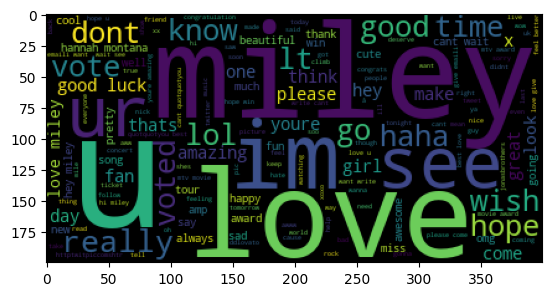

In [39]:
MPlot = WordCloud().generate(MileyCloud)
plt.imshow(MPlot)

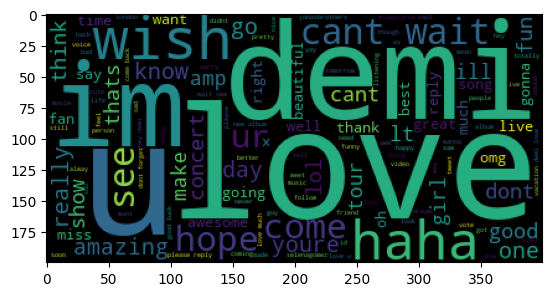

In [40]:
DemiPlot = WordCloud().generate(DemiCloud)
plt.imshow(DemiPlot)

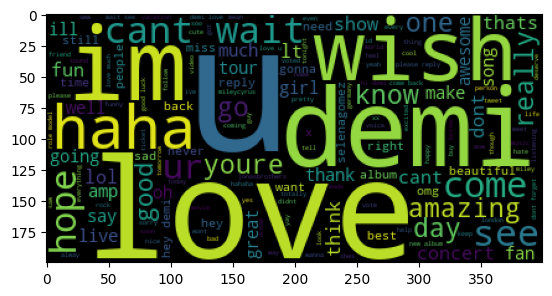

In [41]:
TomPlot = WordCloud().generate(TomCloud)
plt.imshow(TomPlot)